#Numerical regression

in this example we will use Keras to predict wages based on various professional and demographic factors.

In [ ]:
# Import standard Libraries
import pandas as pd
import seaborn as sns
import altair as alt
import tensorflow as tf
import matplotlib.pyplot as plt



sns.set(rc={'figure.figsize':(10,10)})
print("imports ok")

imports ok


##Load Data

In [ ]:
#connect google drive to this colab
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Load data
data = pd.read_csv('/content/gdrive/MyDrive/AIA-IAAC/AIA-Artium-LEEDScore/Iteration2_2969samples_ASE+SDA/atrium_SDA+ASE_v2_2969_samples.csv', delimiter= " ")
pd.set_option('display.max_columns', None)
data.dropna(inplace=True)

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2969 entries, 0 to 2999
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   typicalFacadeGlazingRatio  2969 non-null   float64
 1   typicalFacadeWindowWidth   2969 non-null   int64  
 2   groundFacadeGlazingRatio   2969 non-null   float64
 3   groundFacadeWindowWidth    2969 non-null   int64  
 4   buildingDepth              2969 non-null   int64  
 5   balconyWidth               2969 non-null   int64  
 6   atriumArea                 2969 non-null   int64  
 7   aspectRatio                2969 non-null   float64
 8   groundFloorHeight          2969 non-null   float64
 9   typicalfloorHeight         2969 non-null   float64
 10  numberLevels               2969 non-null   int64  
 11  groundSDA                  2969 non-null   float64
 12  firstSDA                   2969 non-null   float64
 13  groundASE                  2969 non-null   float

In [ ]:
data.shape

(2969, 15)

In [ ]:
#data.drop(columns=["roofArea","buildingHeight"], inplace=True)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2969 entries, 0 to 2999
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   typicalFacadeGlazingRatio  2969 non-null   float64
 1   typicalFacadeWindowWidth   2969 non-null   int64  
 2   groundFacadeGlazingRatio   2969 non-null   float64
 3   groundFacadeWindowWidth    2969 non-null   int64  
 4   buildingDepth              2969 non-null   int64  
 5   balconyWidth               2969 non-null   int64  
 6   atriumArea                 2969 non-null   int64  
 7   aspectRatio                2969 non-null   float64
 8   groundFloorHeight          2969 non-null   float64
 9   typicalfloorHeight         2969 non-null   float64
 10  numberLevels               2969 non-null   int64  
 11  groundSDA                  2969 non-null   float64
 12  firstSDA                   2969 non-null   float64
 13  groundASE                  2969 non-null   float

In [ ]:
pd.options.display.max_columns = None


print(data)

      typicalFacadeGlazingRatio  typicalFacadeWindowWidth  \
0                           0.8                         4   
1                           0.9                         4   
2                           0.8                         3   
3                           0.7                         2   
4                           0.7                         2   
...                         ...                       ...   
2995                        0.7                         4   
2996                        0.8                         3   
2997                        0.8                         2   
2998                        0.9                         3   
2999                        0.8                         2   

      groundFacadeGlazingRatio  groundFacadeWindowWidth  buildingDepth  \
0                          0.8                        4             21   
1                          0.8                        3             38   
2                          0.8               

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2969 entries, 0 to 2999
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   typicalFacadeGlazingRatio  2969 non-null   float64
 1   typicalFacadeWindowWidth   2969 non-null   int64  
 2   groundFacadeGlazingRatio   2969 non-null   float64
 3   groundFacadeWindowWidth    2969 non-null   int64  
 4   buildingDepth              2969 non-null   int64  
 5   balconyWidth               2969 non-null   int64  
 6   atriumArea                 2969 non-null   int64  
 7   aspectRatio                2969 non-null   float64
 8   groundFloorHeight          2969 non-null   float64
 9   typicalfloorHeight         2969 non-null   float64
 10  numberLevels               2969 non-null   int64  
 11  groundSDA                  2969 non-null   float64
 12  firstSDA                   2969 non-null   float64
 13  groundASE                  2969 non-null   float

In [ ]:
for colname, col in data.iteritems():
  print(colname, "min_val", col.min(), "max_val", col.max())

typicalFacadeGlazingRatio min_val 0.7 max_val 0.9
typicalFacadeWindowWidth min_val 2 max_val 4
groundFacadeGlazingRatio min_val 0.7 max_val 0.9
groundFacadeWindowWidth min_val 2 max_val 4
buildingDepth min_val 15 max_val 40
balconyWidth min_val 1 max_val 6
atriumArea min_val 1000 max_val 3900
aspectRatio min_val 0.5 max_val 1.5
groundFloorHeight min_val 3.0 max_val 6.0
typicalfloorHeight min_val 2.5 max_val 3.0
numberLevels min_val 1 max_val 10
groundSDA min_val 26.1 max_val 100.0
firstSDA min_val 15.2 max_val 100.0
groundASE min_val 5.6 max_val 64.4
firstASE min_val 5.0 max_val 34.4


##Prepare Data

**NORMALIZE INPUTS**

In [ ]:
#same code as last time

#declare features
X = data.iloc[:,1:-1]

In [ ]:
X

""
0
1
2
3
4
...
2928
2929
2930
2931


In [ ]:


# Load and instantiate a StandardSclaer 
from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler()

# Apply the scaler to our X-features
X_scaled = scalerX.fit_transform(X)

print(X_scaled.shape)

(2969, 13)


In [ ]:
#declare regression target
#y = data.loc[:,"wage_per_hour"].to_numpy()
y = data.loc[:, ["groundSDA", "firstSDA", "groundASE", "firstASE"]].to_numpy()

#y = y.reshape(-1, 1)

from sklearn.preprocessing import MinMaxScaler
scalerY = MinMaxScaler()


#In this case it makes sense to use MinMax scaling because the wage seems like a relative range
# Apply the scaler to our Y-features
y_scaled = scalerY.fit_transform(y)

print(y_scaled.shape)
print(y_scaled)


(2969, 4)
[[1.         0.25707547 0.2755102  0.24489796]
 [0.32070365 0.09316038 0.1377551  0.10204082]
 [0.73612991 0.10259434 0.23809524 0.10884354]
 ...
 [0.9932341  0.20518868 0.24659864 0.24489796]
 [0.29499323 0.17688679 0.15646259 0.18707483]
 [0.29499323 0.19929245 0.08163265 0.26190476]]


**SPLIT INTO TRAIN AND TEST**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.2, random_state = 21)

In [ ]:
#visualize our data
#we can see that scikitlearn doesnt care if it is a dataframe or a numpy array, because they all function on the same way 
print("TRAIN", "input", X_train.shape, "output", y_train.shape)
print("TEST", "input", X_test.shape, "output", y_test.shape)
print(X_test)
print(y_test)

TRAIN input (2375, 13) output (2375, 4)
TEST input (594, 13) output (594, 4)
[[ 1.23702318 -1.42131337  1.21154151 ...  0.69681393 -0.57089714
  -0.24420193]
 [ 1.23702318 -0.01702738  1.21154151 ... -0.77980615 -0.03823992
  -0.20390203]
 [ 0.00497963 -0.01702738  1.21154151 ... -0.78851778 -0.93122408
  -0.78153396]
 ...
 [ 1.23702318 -0.01702738 -1.23211796 ... -0.50974584 -0.51606478
  -0.41883484]
 [-1.22706392 -1.42131337 -0.01028823 ... -0.31809014 -0.46906561
  -0.51286794]
 [-1.22706392 -0.01702738 -0.01028823 ...  1.07141372  0.38475258
   1.07226153]]
[[0.88362652 0.14504717 0.22619048 0.17006803]
 [0.42489851 0.22523585 0.23129252 0.21088435]
 [0.42219215 0.09080189 0.15816327 0.02721088]
 ...
 [0.50879567 0.15330189 0.20408163 0.11904762]
 [0.56833559 0.16037736 0.19217687 0.18027211]
 [1.         0.28891509 0.39285714 0.23469388]]


#Build model

From the cheatSheet
Regression between 0 and 1>> 
      activation = relu for hidden layers / sigmoid for final layer
      loss = mean squared error
      optimizer = adam
      input from data, is 8 columns
      output is 1 value prediction

In [ ]:
# Instantiate a sequential model
#tf.seed(5)
#model.save()
model = tf.keras.models.Sequential()
n_cols = X_scaled.shape[1]  

# Add 2 dense layers of 30 and 16 neurons each
model.add(tf.keras.layers.Dense(36, input_shape=(n_cols,), activation='relu')) # related to inputs number as for 13 36 is good
model.add(tf.keras.layers.Dense(23, activation='relu'))
model.add(tf.keras.layers.Dense(13, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='relu')) # number of output/predicted features

  
# Add a dense layer with 1 value output
#model.add(tf.keras.layers.Dense(1, activation= "linear"))
  
# Compile your model 
model.compile(optimizer = "adam", loss = "mean_squared_error")


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 36)                504       
                                                                 
 dense_5 (Dense)             (None, 23)                851       
                                                                 
 dense_6 (Dense)             (None, 13)                312       
                                                                 
 dense_7 (Dense)             (None, 8)                 112       
                                                                 
 dense_8 (Dense)             (None, 4)                 36        
                                                                 
Total params: 1,815
Trainable params: 1,815
Non-trainable params: 0
_________________________________________________________________


#Train model

In [ ]:
# Fit your model to the training data for 200 epochs
#we assign this to history variable so we can plot the training data
history = model.fit(X_train,y_train,epochs=200, validation_split=0.2)

Epoch 1/200
60/60 [==============================] - 1s 5ms/step - loss: 0.0696 - val_loss: 0.0486
Epoch 2/200
60/60 [==============================] - 0s 3ms/step - loss: 0.0458 - val_loss: 0.0434
Epoch 3/200
60/60 [==============================] - 0s 3ms/step - loss: 0.0429 - val_loss: 0.0415
Epoch 4/200
60/60 [==============================] - 0s 3ms/step - loss: 0.0307 - val_loss: 0.0260
Epoch 5/200
60/60 [==============================] - 0s 3ms/step - loss: 0.0253 - val_loss: 0.0251
Epoch 6/200
60/60 [==============================] - 0s 4ms/step - loss: 0.0244 - val_loss: 0.0242
Epoch 7/200
60/60 [==============================] - 0s 3ms/step - loss: 0.0236 - val_loss: 0.0235
Epoch 8/200
60/60 [==============================] - 0s 3ms/step - loss: 0.0229 - val_loss: 0.0228
Epoch 9/200
60/60 [==============================] - 0s 3ms/step - loss: 0.0224 - val_loss: 0.0223
Epoch 10/200
60/60 [==============================] - 0s 3ms/step - loss: 0.0220 - val_loss: 0.0220
Epoch 11/

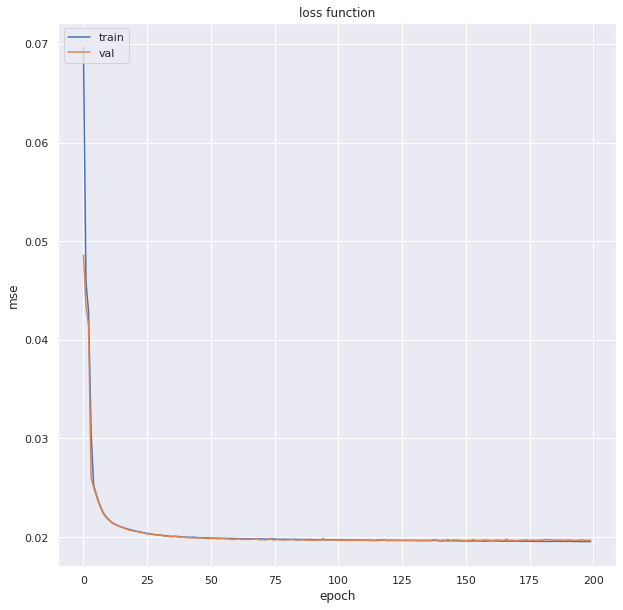

In [ ]:
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss function')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#Evaluate model on test data



In [ ]:
# Evaluate your model accuracy on the test data
loss_test = model.evaluate(X_test,y_test)

# Print accuracy
print('mse_test:', loss_test)

19/19 [==============================] - 0s 2ms/step - loss: 0.0191
mse_test: 0.019124489277601242


#Plot error


In [ ]:
def plot_comparison(x_val, pred, truth, xlab, ylab):
  fig, ax1 = plt.subplots()
  ax1.plot(x_val, truth, color = "red", label = "truth",linestyle='None', marker = "o", markersize = 5)
  ax1.plot(x_val, pred, color = "blue", label = "pred",linestyle='None', marker = "o", markersize = 4, alpha = 0.5)

  ax1.set_xlabel(xlab)
  ax1.set_ylabel(ylab)
  ax1.legend()
  fig.set_figheight(10)
  fig.set_figwidth(20)
  plt.title('Prediction Comparison')
  plt.show()

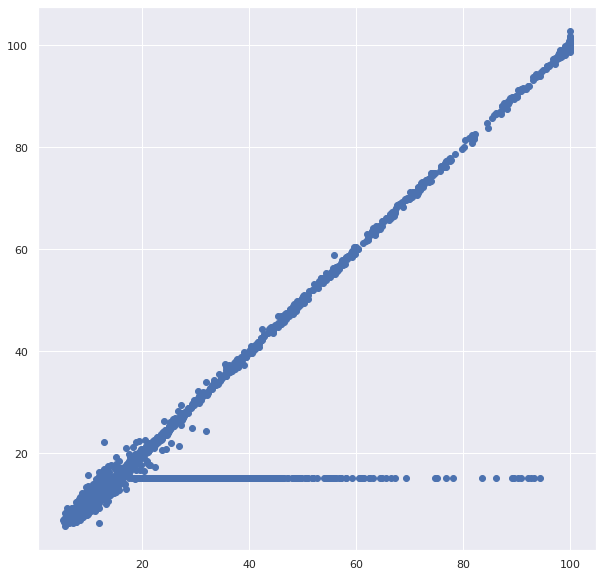

In [ ]:
y_pred = scalerY.inverse_transform(model.predict(X_test))
y_truth = scalerY.inverse_transform(y_test)

plt.scatter(y_truth,y_pred)

In [ ]:
#RADIATION PREDICTIONS
y_pred_01 = y_pred[:,0]
print(y_pred_01.shape)

(594,)


In [ ]:
#RADIATION TRUTH
y_truth_01 = y_truth[:,0]
print(y_truth_01.shape)

(594,)


[23. 31. 34. 26. 38. 21. 38. 15. 36. 33. 36. 32. 38. 27. 28. 35. 37. 30.
 25. 29. 19. 40. 25. 30. 35. 40. 39. 34. 18. 25. 35. 27. 21. 25. 19. 29.
 26. 31. 33. 19. 16. 17. 36. 18. 37. 20. 17. 24. 21. 20. 39. 25. 33. 35.
 15. 38. 37. 26. 17. 17. 21. 25. 16. 32. 24. 21. 27. 23. 37. 22. 38. 20.
 22. 32. 30. 22. 31. 28. 16. 17. 32. 38. 27. 18. 40. 33. 26. 27. 35. 38.
 24. 15. 37. 34. 15. 26. 20. 34. 30. 28. 26. 39. 25. 18. 26. 16. 22. 33.
 33. 32. 18. 36. 24. 27. 22. 30. 37. 27. 33. 35. 28. 28. 32. 18. 22. 32.
 23. 25. 33. 16. 31. 31. 35. 27. 38. 18. 17. 31. 36. 20. 39. 22. 24. 24.
 40. 39. 19. 29. 32. 20. 33. 37. 38. 25. 26. 24. 23. 25. 28. 32. 20. 25.
 37. 20. 37. 15. 29. 39. 39. 20. 15. 28. 29. 37. 32. 40. 19. 38. 37. 32.
 17. 26. 26. 38. 15. 27. 40. 20. 26. 34. 24. 30. 37. 23. 35. 18. 22. 16.
 26. 32. 25. 25. 38. 33. 17. 26. 25. 25. 37. 28. 27. 40. 15. 37. 25. 35.
 32. 28. 19. 17. 34. 28. 21. 39. 31. 30. 34. 20. 33. 30. 36. 40. 34. 24.
 29. 36. 31. 29. 34. 33. 30. 32. 30. 16. 27. 29. 22

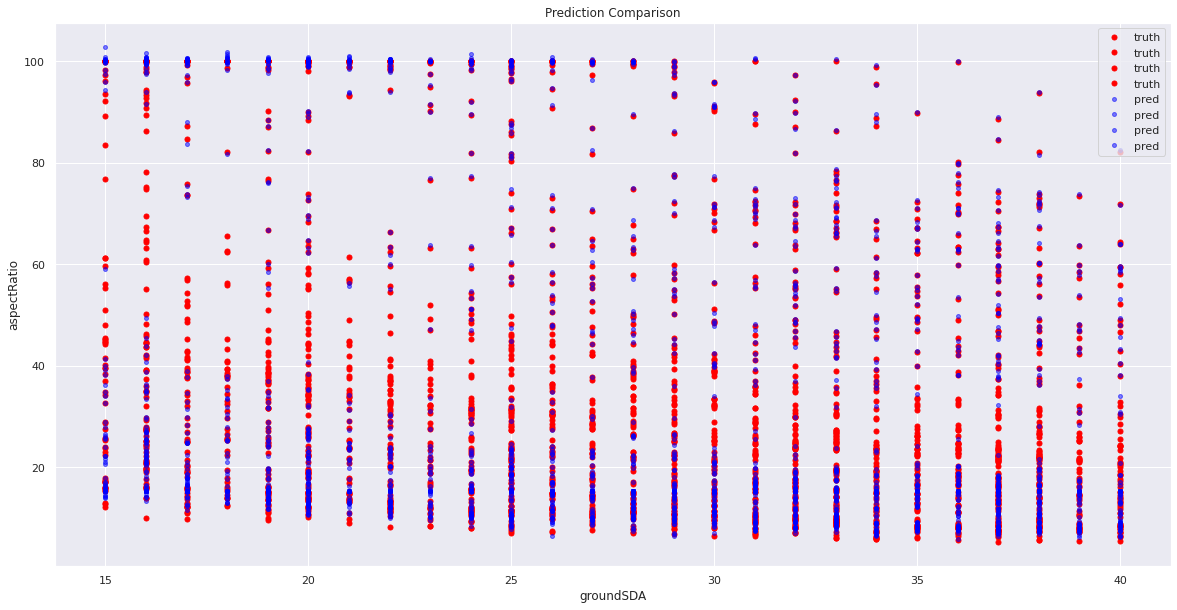

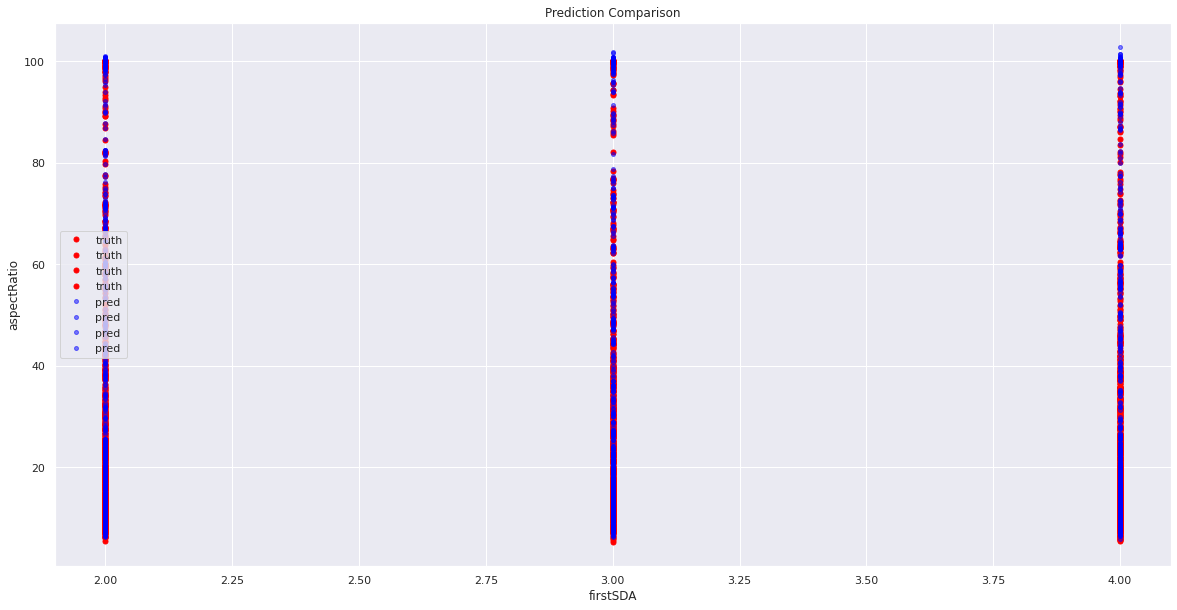

In [ ]:
age_test = (scalerX.inverse_transform(X_test)[:,3])
print(age_test)

exp_test = (scalerX.inverse_transform(X_test)[:,2])

plot_comparison(age_test, y_pred, y_truth, "groundSDA", "aspectRatio")
plot_comparison(exp_test, y_pred, y_truth,  "firstSDA", "aspectRatio")

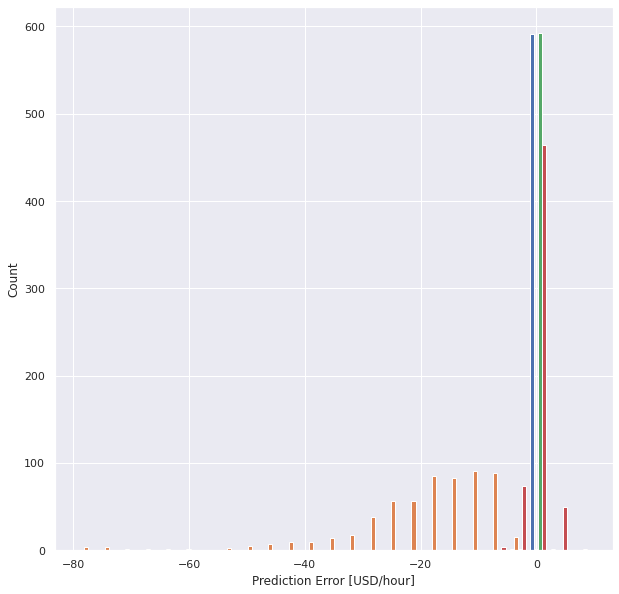

In [ ]:
error = y_pred - y_truth
plt.hist(error, bins=25)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

In [ ]:
#run only once, 
!pip install ghhops-server flask-ngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.7 MB 3.5 MB/s 
  Created wheel for rhino3dm: filename=rhino3dm-7.14.2-cp37-cp37m-linux_x86_64.whl size=4995198 sha256=18e5e55ac9d40ede78188b12018ae8ff63e393b3d0b2b710e1fb9b590b0b01fb
  Stored in directory: /root/.cache/pip/wheels/54/fd/27/c1c91b5631a9dcb2291a8541117b0040fe461756f9c77430fc
Successfully built rhino3dm


In [ ]:
import pandas as pd
import seaborn as sns
import altair as alt
import tensorflow as tf
import matplotlib.pyplot as plt
import joblib
from flask import Flask
from flask_ngrok import run_with_ngrok
import ghhops_server as hs
import numpy
import rhino3dm


sns.set(rc={'figure.figsize':(10,10)})
print("imports ok")

imports ok


In [ ]:
#https://www.tensorflow.org/guide/keras/save_and_serialize
model.save("Atrium_5dense.h5")

scalerX_filename = "/content/gdrive/MyDrive/AIA-IAAC/AIA-Artium-LEEDScore/Iteration2_2969samples_ASE+SDA/ANNregression_5DensescalerXAtoB.save"
joblib.dump(scalerX, scalerX_filename)

scalerY_filename = "/content/gdrive/MyDrive/AIA-IAAC/AIA-Artium-LEEDScore/Iteration2_2969samples_ASE+SDA/ANNregression_5DensescalerYAtoB.save"
joblib.dump(scalerY, scalerY_filename)

['/content/gdrive/MyDrive/AIA-IAAC/AIA-Artium-LEEDScore/Iteration2_2969samples_ASE+SDA/ANNregression_5DensescalerYAtoB.save']

**Hops**

In [ ]:
# 1 --- import model

path = "Atrium_5dense.h5"
model = tf.keras.models.load_model(path)

# 2 --- set up scaler variables

scalerX = joblib.load("/content/gdrive/MyDrive/AIA-IAAC/AIA-Artium-LEEDScore/Iteration2_2969samples_ASE+SDA/ANNregression_5DensescalerXAtoB.save")
scalerY = joblib.load("/content/gdrive/MyDrive/AIA-IAAC/AIA-Artium-LEEDScore/Iteration2_2969samples_ASE+SDA/ANNregression_5DensescalerYAtoB.save")


def myMLPredictions(typicalFacadeGlazingRatio, typicalFacadeWindowWidth, groundFacadeGlazingRatio, groundFacadeWindowWidth, buildingDepth, balconyWidth, atriumArea, aspectRatio, groundFloorHeight, typicalfloorHeight, numberLevels):

    # Create Input Array
    new_data = pd.DataFrame([[typicalFacadeGlazingRatio, typicalFacadeWindowWidth, groundFacadeGlazingRatio, groundFacadeWindowWidth, buildingDepth, balconyWidth, atriumArea, aspectRatio, groundFloorHeight, typicalfloorHeight, numberLevels]])

    # Scale Input to match the same format from the trained model
    scaled_input = scalerX.transform(new_data)

    # Generate Predictions from Scaled Input using model.predict
    #https://www.tensorflow.org/api_docs/python/tf/keras/Model

    # 01// predict
    out = model.predict(scaled_input)
    #02 // inverse scaling
    predictions = scalerY.inverse_transform(out)

    
    #Flatten predictions list to be readable for hops
    pred_list = predictions.tolist()
    flat_list = []

    for i in pred_list:
        flat_list += i

    # Set each prediction value to a variable
    #groundSDA, firstSDA, groundASE, firstASE
    groundSDA= flat_list[0]
    firstSDA= flat_list[1]
    groundASE= flat_list[2]
    firstASE= flat_list[3]
   

   

    return groundSDA, firstSDA, groundASE, firstASE



In [ ]:
app = Flask(__name__)
#using ngrok library to stream data
run_with_ngrok(app) 
hops = hs.Hops(app)

# -- ATOB MODEL

@hops.component(
    "/myAtriumDaylighting",
    name="Atrium Daylighting Analysis",
    description="Environmental analysis for atriums",
    inputs=[
        hs.HopsNumber("typicalFacadeGlazingRatio", "typicalFacadeGlazingRatio", "glazing ratio for typical floors"),
        hs.HopsNumber("typicalFacadeWindowWidth", "typicalFacadeWindowWidth", "window width for typical floor"),
        hs.HopsNumber("groundFacadeGlazingRatio", "groundFacadeGlazingRatio", "glazing ratio for ground floor"),
        hs.HopsNumber("groundFacadeWindowWidth", "groundFacadeWindowWidth", "window width for ground floor"),
        hs.HopsNumber("buildingDepth", "buildingDepth", "depth of building floorplate"),
        hs.HopsNumber("balconyWidth", "balconyWidth", "width of inner atrium balcony"),
        hs.HopsNumber("atriumArea", "atriumArea", "area of atrium"),
        hs.HopsNumber("aspectRatio", "aspectRatio", "aspect ratio of building"),
        hs.HopsNumber("groundFloorHeight", "groundFloorHeight", "floor height of ground level"),
        hs.HopsNumber("typicalfloorHeight", "typicalfloorHeight", "floor height of typical level"),
        hs.HopsInteger("numberLevels", "numberLevels", "number of building levels"),
    ],
    outputs=[
        hs.HopsNumber("groundSDA"),
        hs.HopsNumber("firstSDA"),
        hs.HopsNumber("groundASE"),
        hs.HopsNumber("firstASE"),
       
    
    ]
)

def myMLFunctionAtoB(typicalFacadeGlazingRatio, typicalFacadeWindowWidth, groundFacadeGlazingRatio, groundFacadeWindowWidth, buildingDepth, balconyWidth, atriumArea, aspectRatio, groundFloorHeight, typicalfloorHeight, numberLevels):
    return myMLPredictions(typicalFacadeGlazingRatio, typicalFacadeWindowWidth, groundFacadeGlazingRatio, groundFacadeWindowWidth, buildingDepth, balconyWidth, atriumArea, aspectRatio, groundFloorHeight, typicalfloorHeight, numberLevels)



In [ ]:
#run the app
app.run()